# **Methodology - Model**

#### **Drop các cột không cần thiết và thực hiện PCA**

In [11]:
import pandas as pd
df = pd.read_excel("Handled Data.xlsx","Sheet1")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Ngày đăng                          8809 non-null   object 
 1   Chiều rộng                         8809 non-null   float64
 2   Quận/Huyện                         8809 non-null   object 
 3   Kinh độ                            8809 non-null   float64
 4   Vĩ độ                              8809 non-null   float64
 5   Chiều dài                          8809 non-null   float64
 6   Diện tích                          8809 non-null   float64
 7   Phòng ngủ                          8809 non-null   int64  
 8   Phòng WC                           8809 non-null   int64  
 9   Phòng khách                        8809 non-null   int64  
 10  Nhà bếp                            8809 non-null   int64  
 11  Sân thượng/Ban công                8809 non-null   int64

In [12]:
df = df.drop(columns=['Ngày đăng', 'Quận/Huyện', 'Kinh độ', 'Vĩ độ'])

In [13]:
# Tạo DataFrame X chứa các đặc trưng được chọn từ DataFrame df
df_features = df.drop(columns=['Giá']).copy()

# Tạo Series Y chứa biến phụ thuộc được chọn từ DataFrame df
target = df['Giá'].copy()

In [14]:
from sklearn.decomposition import PCA

# Khởi tạo mô hình PCA
pca = PCA()

# Phân tích dữ liệu
pca.fit(df_features)

PCA()

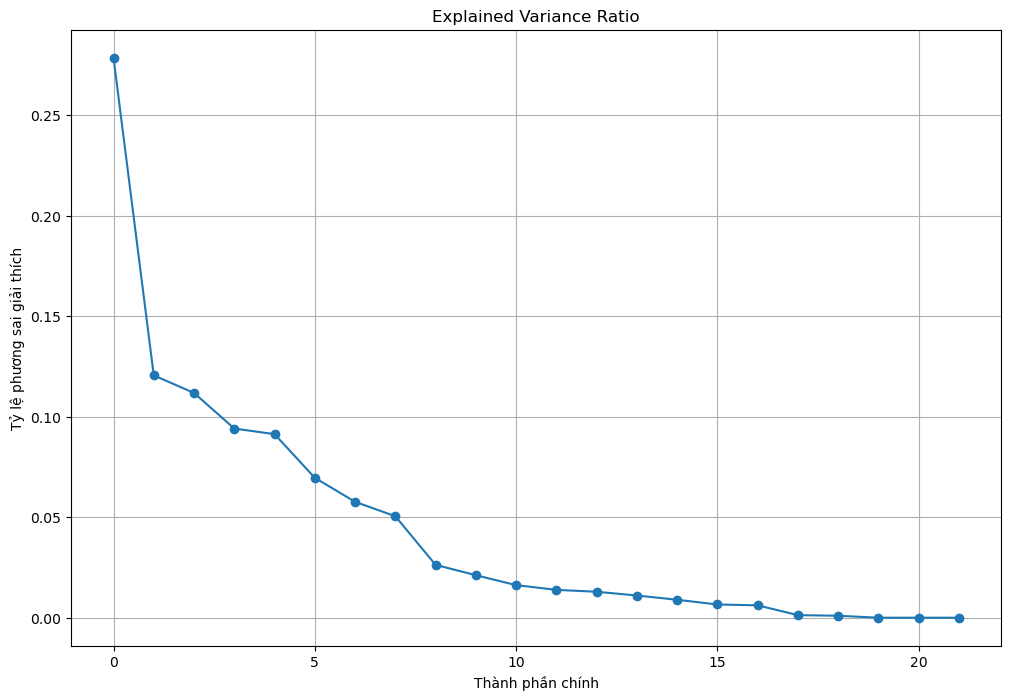

Thành phần chính 1: 0.2787
Thành phần chính 2: 0.1206
Thành phần chính 3: 0.1119
Thành phần chính 4: 0.0942
Thành phần chính 5: 0.0914
Thành phần chính 6: 0.0696
Thành phần chính 7: 0.0577
Thành phần chính 8: 0.0505
Thành phần chính 9: 0.0263
Thành phần chính 10: 0.0212
Thành phần chính 11: 0.0162
Thành phần chính 12: 0.0139
Thành phần chính 13: 0.0129
Thành phần chính 14: 0.0111
Thành phần chính 15: 0.0089
Thành phần chính 16: 0.0066
Thành phần chính 17: 0.0062
Thành phần chính 18: 0.0013
Thành phần chính 19: 0.0010
Thành phần chính 20: 0.0000
Thành phần chính 21: 0.0000
Thành phần chính 22: 0.0000


In [15]:
import matplotlib.pyplot as plt
# Lấy tỷ lệ phương sai giải thích
variance_ratios = pca.explained_variance_ratio_

# Vẽ biểu đồ cho tỷ lệ phương sai giải thích
plt.figure(figsize=(12, 8))
plt.plot(variance_ratios, marker='o', linestyle='-')
plt.xlabel('Thành phần chính')
plt.ylabel('Tỷ lệ phương sai giải thích')
plt.title('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Hiển thị tỷ lệ phương sai giải thích cho mỗi thành phần chính
for i, ratio in enumerate(variance_ratios):
    print(f"Thành phần chính {i+1}: {ratio:.4f}")

- PC đầu tiên giải thích được tỷ lệ phương sai cao nhất.
- Tỷ lệ phương sai giải thích bởi các PC sau giảm dần.

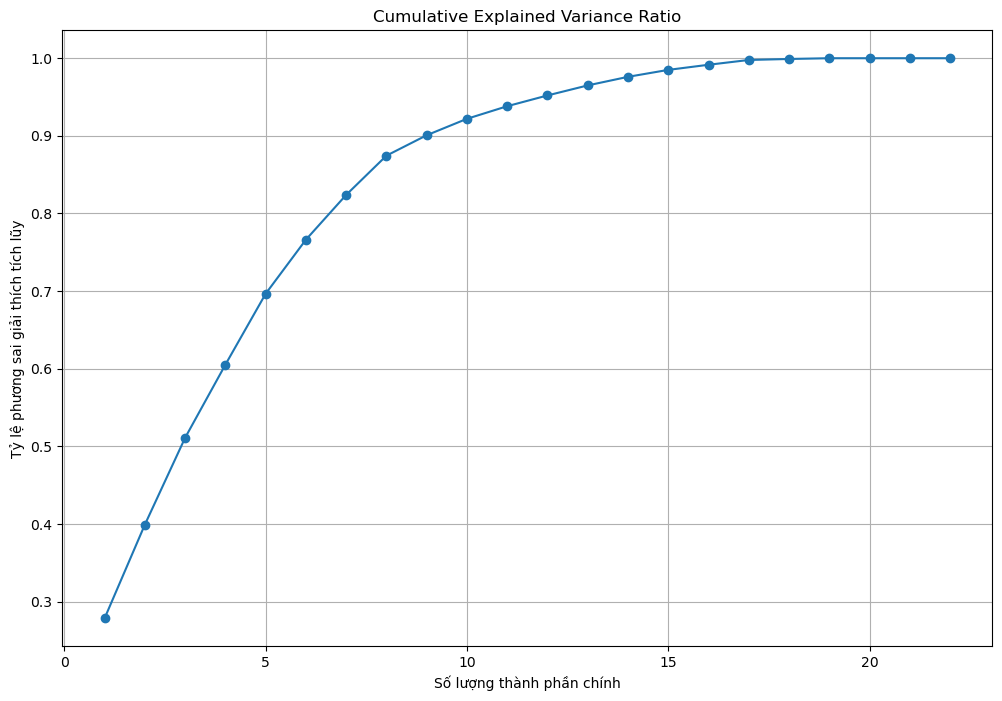

Số lượng thành phần chính 1: 0.2787
Số lượng thành phần chính 2: 0.3993
Số lượng thành phần chính 3: 0.5112
Số lượng thành phần chính 4: 0.6053
Số lượng thành phần chính 5: 0.6967
Số lượng thành phần chính 6: 0.7663
Số lượng thành phần chính 7: 0.8240
Số lượng thành phần chính 8: 0.8745
Số lượng thành phần chính 9: 0.9008
Số lượng thành phần chính 10: 0.9220
Số lượng thành phần chính 11: 0.9382
Số lượng thành phần chính 12: 0.9521
Số lượng thành phần chính 13: 0.9650
Số lượng thành phần chính 14: 0.9760
Số lượng thành phần chính 15: 0.9850
Số lượng thành phần chính 16: 0.9916
Số lượng thành phần chính 17: 0.9977
Số lượng thành phần chính 18: 0.9990
Số lượng thành phần chính 19: 1.0000
Số lượng thành phần chính 20: 1.0000
Số lượng thành phần chính 21: 1.0000
Số lượng thành phần chính 22: 1.0000


In [16]:
import numpy as np
# Tính tỷ lệ phương sai giải thích tích lũy
cumulative_variance_ratios = np.cumsum(variance_ratios)

# Vẽ biểu đồ cho tỷ lệ phương sai giải thích tích lũy
plt.figure(figsize=(12, 8))
plt.plot(range(1, len(cumulative_variance_ratios) + 1), cumulative_variance_ratios, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Số lượng thành phần chính')
plt.ylabel('Tỷ lệ phương sai giải thích tích lũy')
plt.grid(True)
plt.show()

# Hiển thị tỷ lệ phương sai giải thích tích lũy cho mỗi số lượng thành phần chính
for i, ratio in enumerate(cumulative_variance_ratios):
    print(f"Số lượng thành phần chính {i+1}: {ratio:.4f}")

- Tỷ lệ phương sai giải thích tích lũy tăng dần theo số lượng thành phần chính.
- Tỷ lệ phương sai giải thích tích lũy bắt đầu bão hòa sau khoảng 12 thành phần chính. Điều này có nghĩa là việc thêm nhiều thành phần chính hơn nữa sẽ không cải thiện đáng kể khả năng giải thích phương sai của mô hình.

Số lượng thành phần chính cần giữ lại để giải thích ít nhất 95% phương sai: 12
Số lượng thành phần chính cần giữ lại để giải thích ít nhất 90% phương sai: 9
Số lượng thành phần chính cần giữ lại để giải thích ít nhất 85% phương sai: 8


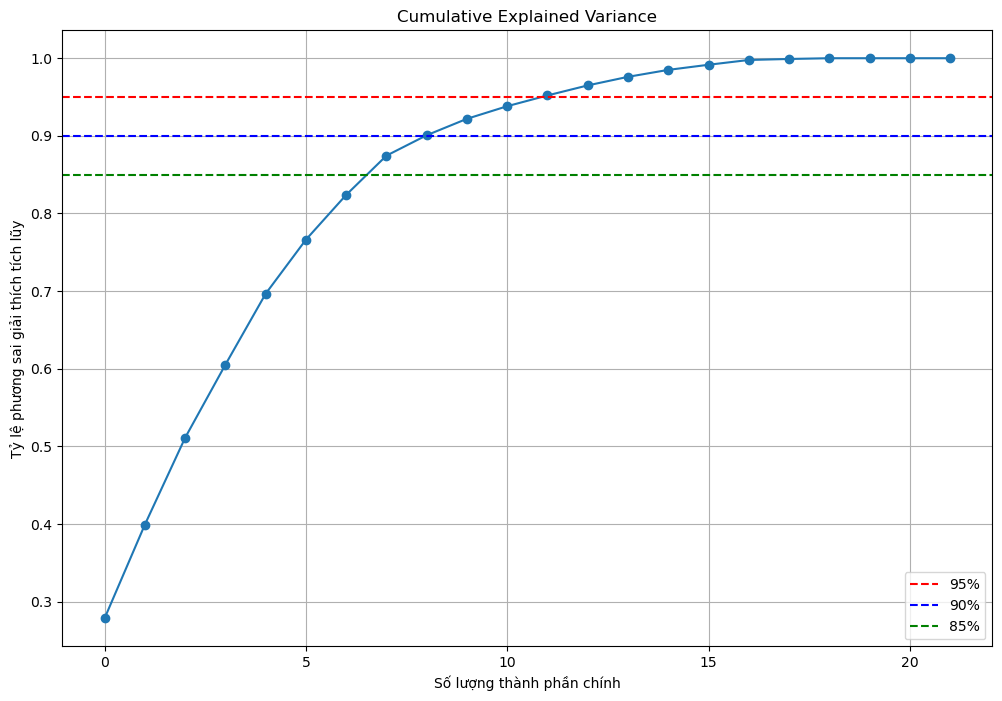

In [17]:
# Xác định các ngưỡng giải thích phương sai
thresholds = [1, 0.95, 0.9, 0.85]

# Xác định số lượng thành phần chính cần giữ lại cho mỗi ngưỡng
num_components = []
for threshold in thresholds:
    num_components.append(np.argmax(cumulative_variance_ratios >= threshold) + 1)

for threshold, num_component in zip(thresholds[1:], num_components[1:]):
    print(f"Số lượng thành phần chính cần giữ lại để giải thích ít nhất {int(threshold*100)}% phương sai: {num_component}")


# Vẽ biểu đồ 
plt.figure(figsize=(12, 8))
plt.plot(cumulative_variance_ratios, marker='o', linestyle='-')
plt.axhline(y=0.95, color='r', linestyle='--', label='95%')
plt.axhline(y=0.9, color='b', linestyle='--', label='90%')
plt.axhline(y=0.85, color='g', linestyle='--', label='85%')
plt.title('Cumulative Explained Variance')
plt.xlabel('Số lượng thành phần chính')
plt.ylabel('Tỷ lệ phương sai giải thích tích lũy')
plt.grid(True)
plt.legend()
plt.show()

Quyết định giữ lại 12 thành phần chính với tỷ lệ phương sai giải thích tích lũy là 0.9521

In [18]:
# ÁP dụng PCA để giảm kích thước
pca = PCA(n_components = 12)
df_features_pca = pca.fit_transform(df_features)
df_features_pca

array([[-2.17853673,  1.09278393,  0.74517874, ...,  0.73956935,
         0.34183132, -0.10053128],
       [-1.48443367,  3.39596899,  1.25198194, ..., -0.48155777,
        -0.44697546, -0.22457347],
       [-0.24957266,  3.4753627 ,  2.40957193, ..., -0.44424914,
        -0.43946578, -0.51645948],
       ...,
       [ 0.316502  ,  1.69019489,  3.10436962, ...,  0.75183141,
        -0.61865612,  0.46196259],
       [-2.46702386,  0.23636376, -0.60988618, ..., -0.08518324,
        -0.15482804,  0.01723773],
       [-2.15102351,  0.17304603,  0.27194421, ..., -0.91429489,
         0.47949067, -0.13999744]])

#### **Triển khai việc huấn luyện và kiểm tra các mô hình. So sánh các chỉ số đánh giá của các mô hình và đưa ra kết luận**

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features_pca, target, test_size=0.2)

**Tổng quan về các mô hình sẽ sử dụng:**
- **Linear Regression (Hồi quy tuyến tính)** là một phương pháp thống kê được sử dụng để mô hình hóa mối quan hệ giữa một biến phụ thuộc (dependent variable) và một hoặc nhiều biến độc lập (independent variables). Mục tiêu của hồi quy tuyến tính là tìm một đường thẳng (hoặc một siêu phẳng trong không gian nhiều chiều) tốt nhất để dự đoán giá trị của biến phụ thuộc dựa trên giá trị của các biến độc lập.

- **Ridge Regression (Hồi quy Ridge)** là một biến thể của hồi quy tuyến tính được sử dụng để xử lý các vấn đề về đa cộng tuyến (multicollinearity) và giúp cải thiện độ ổn định và độ chính xác của mô hình hồi quy. Ridge Regression thêm một thuật ngữ phạt (regularization term) vào hàm mất mát của hồi quy tuyến tính để giảm thiểu ảnh hưởng của các hệ số hồi quy lớn, từ đó giảm overfitting.

- **Lasso Regression (Least Absolute Shrinkage and Selection Operator)** là một biến thể của hồi quy tuyến tính được sử dụng để thực hiện đồng thời việc lựa chọn biến (feature selection) và điều chỉnh (regularization) nhằm cải thiện độ chính xác và đơn giản hóa mô hình hồi quy. Lasso Regression thêm một thuật ngữ phạt (regularization term) vào hàm mất mát của hồi quy tuyến tính, nhưng khác với Ridge Regression, thuật ngữ phạt trong Lasso dựa trên giá trị tuyệt đối của các hệ số hồi quy.

- **Decision Tree (Cây quyết định)** là một thuật toán học máy được sử dụng để phân loại và hồi quy. Nó hoạt động bằng cách chia dữ liệu đầu vào thành các tập con nhỏ hơn dựa trên các tiêu chí nhất định, tạo thành một cấu trúc dạng cây, trong đó mỗi nút đại diện cho một quyết định dựa trên giá trị của một thuộc tính.

- **Random Forest** là một thuật toán học máy mạnh mẽ và linh hoạt được sử dụng cho cả bài toán phân loại và hồi quy. Nó thuộc nhóm các phương pháp ensemble learning, trong đó nhiều mô hình học máy đơn giản (trong trường hợp này là các cây quyết định) được kết hợp lại để tạo ra một mô hình mạnh mẽ hơn.

- **Gradient Boosting** là một phương pháp ensemble learning mạnh mẽ được sử dụng cho cả bài toán phân loại và hồi quy. Nó kết hợp nhiều mô hình yếu (weak learners), thường là các cây quyết định, để tạo ra một mô hình dự đoán mạnh mẽ hơn. Gradient Boosting hoạt động bằng cách xây dựng các mô hình mới để giảm thiểu lỗi của mô hình hiện tại thông qua một quá trình lặp đi lặp lại, nơi mỗi mô hình mới tập trung vào việc sửa lỗi của mô hình trước đó.

               Model       MSE       MAE        R2
0  Linear Regression  5.450013  1.707550  0.614092
1   Ridge Regression  5.449884  1.707505  0.614101
2   Lasso Regression  5.563383  1.726661  0.606064
3      Decision Tree  6.396784  1.840652  0.547052
4      Random Forest  4.855765  1.571356  0.656170
5  Gradient Boosting  5.078654  1.621607  0.640387


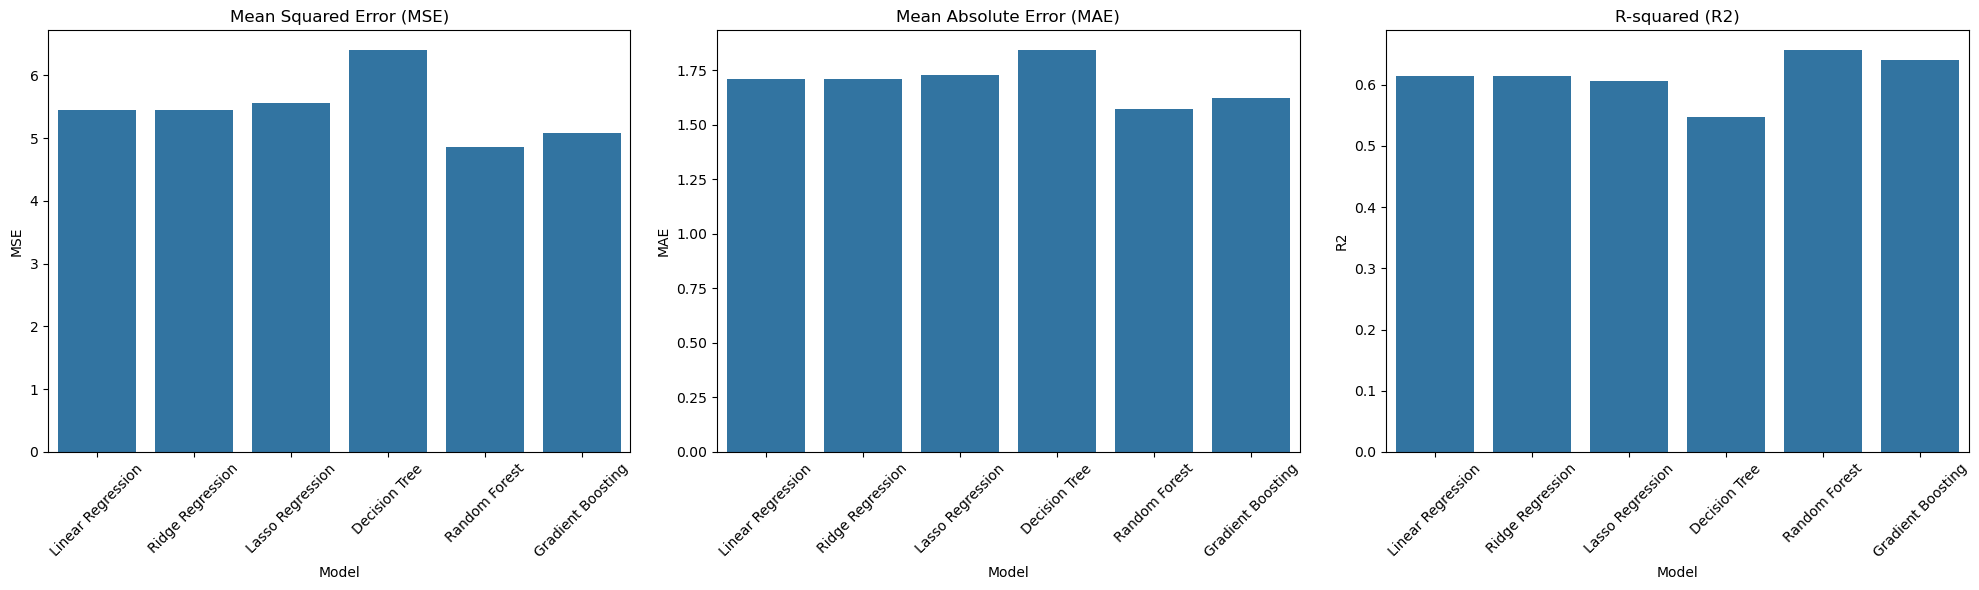

In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Danh sách các mô hình
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': RidgeCV(alphas=[0.1, 1.0, 10.0]),
    'Lasso Regression': LassoCV(alphas=[0.1, 1.0, 10.0]),
    'Decision Tree': DecisionTreeRegressor(max_depth=5),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
}

# Danh sách để lưu kết quả tạm thời
results_list = []

# Huấn luyện và đánh giá từng mô hình
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Lưu kết quả vào danh sách
    results_list.append({'Model': name, 'MSE': mse, 'MAE': mae, 'R2': r2})

# Tạo DataFrame sau khi đã có đầy đủ kết quả
results = pd.DataFrame(results_list)

# In kết quả
print(results)

# Tạo biểu đồ cột so sánh các độ đo (MSE, MAE, R2)
plt.figure(figsize=(20, 6))

# Biểu đồ MSE
plt.subplot(1, 3, 1)  
sns.barplot(x='Model', y='MSE', data=results)
plt.title('Mean Squared Error (MSE)')
plt.xticks(rotation=45)

# Biểu đồ MAE
plt.subplot(1, 3, 2) 
sns.barplot(x='Model', y='MAE', data=results)
plt.title('Mean Absolute Error (MAE)')
plt.xticks(rotation=45)

# Biểu đồ R2
plt.subplot(1, 3, 3)  
sns.barplot(x='Model', y='R2', data=results)
plt.title('R-squared (R2)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Phân tích:**

- **MSE (Mean Squared Error)**: Giá trị càng thấp càng tốt vì nó cho thấy các dự đoán của mô hình gần với giá trị thực tế hơn.
- **MAE (Mean Absolute Error)**: Giá trị càng thấp càng tốt vì nó phản ánh rằng trung bình, các dự đoán của mô hình gần với giá trị thực tế hơn.
- **R2 (Hệ số xác định)**: Giá trị càng cao càng tốt, vì nó cho thấy mô hình có khả năng giải thích được một tỷ lệ lớn biến thiên của biến phụ thuộc từ các biến độc lập.

**Mô hình tốt nhất:**

Dựa trên so sánh các chỉ số này:

- **Random Forest** có MSE thấp nhất (4.526087), MAE thấp nhất (1.545871), và chỉ số R2 cao nhất (0.678597). Điều này chỉ ra rằng Random Forest là mô hình tốt nhất trong số các mô hình được đánh giá để dự đoán giá nhà.

- **Gradient Boosting** cũng có hiệu suất rất tốt với MSE thấp thứ hai (4.620555), MAE thấp thứ hai (1.574315), và chỉ số R2 cao thứ hai (0.671889), làm cho nó trở thành một lựa chọn đáng xem xét.

**Kết luận:**

Nhìn chung, Random Forest là mô hình tốt nhất để dự đoán giá nhà dựa trên các chỉ số đánh giá hiện có. Tuy nhiên, Gradient Boosting cũng thể hiện hiệu suất mạnh mẽ và có thể là một sự thay thế đáng tin cậy.

#### **Triển khai mô hình học sâu. Thực hiện huấn luyện và kiểm tra mô hình**

**Giải thích thuật toán sử dụng:**
- **Lan truyền tiến (Forward Propagation):** Dữ liệu đầu vào được đưa vào mạng neural. Mỗi lớp trong mạng thực hiện các phép tính để biến đổi dữ liệu đầu vào và truyền kết quả qua các lớp kế tiếp cho đến khi ra kết quả cuối cùng.

- **Hàm mất mát (Loss Function):** Hàm mất mát đo lường sai số giữa dự đoán của mô hình và kết quả thực tế. Giá trị này càng nhỏ thì dự đoán càng chính xác.

- **Lan truyền ngược (Backward Propagation):** Tính toán gradient của hàm mất mát với các trọng số của mô hình, cho biết cần điều chỉnh các trọng số như thế nào để giảm sai số. Lan truyền gradient này ngược lại qua các lớp của mạng để cập nhật các trọng số.

- **Cập nhật trọng số (Weight Update):** Sử dụng thuật toán tối ưu hóa (như Gradient Descent) để điều chỉnh các trọng số dựa trên gradient vừa tính được, nhằm giảm hàm mất mát và cải thiện mô hình.

Epoch [1/100], Train Loss: 13.1145, Test Loss: 5.8854
MSE: 5.8854, MAE: 1.7567, R2: 0.5849
Epoch [2/100], Train Loss: 5.1533, Test Loss: 5.5405
MSE: 5.5405, MAE: 1.6876, R2: 0.6092
Epoch [3/100], Train Loss: 4.9552, Test Loss: 5.4034
MSE: 5.4034, MAE: 1.6757, R2: 0.6189
Epoch [4/100], Train Loss: 4.9630, Test Loss: 5.5839
MSE: 5.5839, MAE: 1.6904, R2: 0.6061
Epoch [5/100], Train Loss: 4.8748, Test Loss: 5.6089
MSE: 5.6089, MAE: 1.7264, R2: 0.6044
Epoch [6/100], Train Loss: 4.8794, Test Loss: 5.3415
MSE: 5.3415, MAE: 1.6570, R2: 0.6232
Epoch [7/100], Train Loss: 4.8687, Test Loss: 5.4056
MSE: 5.4056, MAE: 1.6651, R2: 0.6187
Epoch [8/100], Train Loss: 4.8465, Test Loss: 5.6180
MSE: 5.6180, MAE: 1.7088, R2: 0.6037
Epoch [9/100], Train Loss: 4.8251, Test Loss: 5.5325
MSE: 5.5325, MAE: 1.7056, R2: 0.6098
Epoch [10/100], Train Loss: 4.8217, Test Loss: 5.2504
MSE: 5.2504, MAE: 1.6353, R2: 0.6297
Epoch [11/100], Train Loss: 4.8038, Test Loss: 5.2956
MSE: 5.2956, MAE: 1.6579, R2: 0.6265
Epoch [

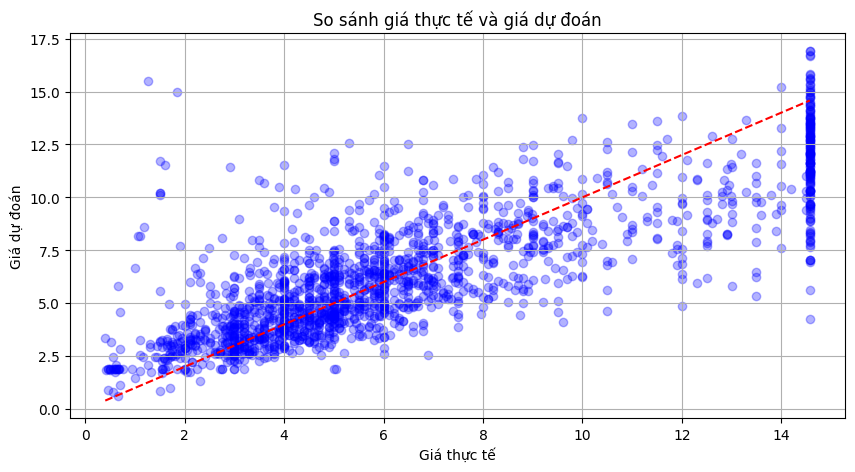

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Chuyển đổi dữ liệu thành tensor của PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Tạo DataLoader cho tập huấn luyện và kiểm tra
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Định nghĩa mô hình mạng neural
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(12, 6)  # Lớp fully connected 1: 12 đầu vào, 6 đầu ra
        self.fc2 = nn.Linear(6, 3)  # Lớp fully connected 2: 6 đầu vào, 3 đầu ra
        self.fc3 = nn.Linear(3, 1)   # Lớp fully connected 3: 3 đầu vào, 1 đầu ra (dùng cho hồi quy)

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Hàm kích hoạt ReLU cho lớp ẩn thứ nhất
        x = torch.relu(self.fc2(x))  # Hàm kích hoạt ReLU cho lớp ẩn thứ hai
        x = self.fc3(x)              # Lớp đầu ra (không cần hàm kích hoạt để cho bài toán hồi quy)
        return x

model = NeuralNet()  # Khởi tạo mô hình neural network

# Định nghĩa hàm mất mát và thuật toán tối ưu hóa
criterion = nn.MSELoss()                          # Hàm mất mát: Mean Squared Error (MSE)
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Thuật toán tối ưu hóa: Adam, learning rate = 0.001

# Vòng lặp huấn luyện mô hình
num_epochs = 100
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()  # Chuyển sang chế độ huấn luyện
    train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Đặt gradient về 0
        outputs = model(inputs)  # Lan truyền thuận
        loss = criterion(outputs.squeeze(), targets)  # Tính toán hàm mất mát
        loss.backward()  # Lan truyền ngược (tính gradient)
        optimizer.step()  # Cập nhật các tham số mô hình
        train_loss += loss.item() * inputs.size(0)  # Tính tổng hàm mất mát trên toàn bộ batch
    train_loss /= len(train_loader.dataset)  # Chuẩn hóa hàm mất mát trung bình
    train_losses.append(train_loss)

    # Đánh giá trên tập kiểm tra
    model.eval()  # Chuyển sang chế độ đánh giá
    test_loss = 0.0
    predictions = []
    with torch.no_grad():  # Tắt tính toán gradient trong quá trình đánh giá
        for inputs, targets in test_loader:
            outputs = model(inputs)  # Lan truyền thuận
            loss = criterion(outputs.squeeze(), targets)  # Tính toán hàm mất mát
            test_loss += loss.item() * inputs.size(0)  # Tính tổng hàm mất mát trên toàn bộ batch
            predictions.extend(outputs.squeeze().tolist())
        test_loss /= len(test_loader.dataset)  # Chuẩn hóa hàm mất mát trung bình
        test_losses.append(test_loss)

    # Tính toán các chỉ số đánh giá: MSE, MAE, R2
    y_true = y_test_tensor.numpy()
    y_pred = np.array(predictions)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')
    print(f'MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}')


# So sánh giá thực tế và giá dự đoán
plt.figure(figsize=(10, 5))
plt.scatter(y_true, y_pred, color='blue', alpha=0.3)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], linestyle='--', color='red')
plt.xlabel('Giá thực tế')
plt.ylabel('Giá dự đoán')
plt.title('So sánh giá thực tế và giá dự đoán')
plt.grid(True)
plt.show()


# **Khó khăn gặp phải:**

-	Khó khăn trong việc lên ý tưởng, triển khai xây dựng thuật toán cào dữ liệu.
-	Thiếu kiến thức, hiểu biết về các công cụ và kỹ thuật web scraping, các thư viện như BeautifulSoup, Scrapy, hoặc Selenium. Do đó khó có thể lựa chọn phương pháp để tiến hành thực hiện.
-	Việc hiểu và phân tích cấu trúc HTML của trang web để xác định dữ liệu cần cào.
-	Xử lý cái dữ liệu cào về được khi giá trị trên thẻ HTML và mô tả có sự sai khác.
-	Lựa chọn phương pháp xử lý các thuộc tính có missing value theo từng phần trăm dữ liệu bị khuyết sao cho hợp lý.
-	Tỉ lệ outlier khá cao, khó khăn trong việc lựa chọn phương pháp xử lý để có thể dữ lại tối đa dữ liệu, tránh làm mất mát thông tin.
-	Lựa chọn model phù hợp nhất đối với tập dữ liệu và mục đích bài ra khi một số các model bị ảnh hưởng bởi outlier vì vậy cần tìm hiểu, chọn lựa và xây dựng các model ít bị ảnh hưởng bởi outlier.
-	Nghiên cứu sâu về thuật toán Deep Learning về ý tưởng và quy luật vận hành của model.

# **Kết luận**

Dự án "Dự báo Giá Nhà" nhằm ứng dụng các kỹ thuật học máy và học sâu để phân tích và dự báo giá nhà, là một bài tập tổng hợp các kỹ năng đã học trong môn Nhập môn Khoa học Dữ liệu. Từ thu thập, tiền xử lý dữ liệu, đến xây dựng và đánh giá mô hình, dự án này giúp thực hành toàn bộ quy trình khoa học dữ liệu, không chỉ mang lại những đóng góp thiết thực cho lĩnh vực bất động sản mà còn mở ra các hướng nghiên cứu và ứng dụng mới trong khoa học dữ liệu.
Báo cáo cuối kỳ cung cấp cái nhìn chi tiết về quá trình từ thu thập dữ liệu đến xử lý, triển khai và đánh giá mô hình. Thông qua dự án này giúp phát triển được các kỹ năng phân tích dữ liệu, xử lý dữ liệu lớn, và ứng dụng các mô hình học máy, nâng cao kỹ năng chuyên môn và hiểu biết trong lĩnh vực khoa học dữ liệu. Đồng thời giúp phát triển khả năng làm việc nhóm, giải quyết vấn đề, và trình bày báo cáo chuyên nghiệp, chuẩn bị cho công việc trong lĩnh vực khoa học dữ liệu và trí tuệ nhân tạo.